In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

x_set = np.array([1, 2, 3, 4, 5, 6])

def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
    
X = [x_set, f]
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))


{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

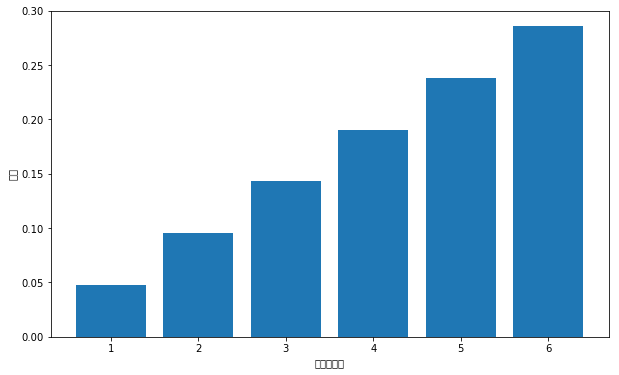

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel('確率')
plt.show()

In [3]:
np.all(prob >=0)

True

In [4]:
np.sum(prob)


1.000

In [5]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
F(3)

0.286

In [6]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

In [7]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [8]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.336

In [9]:
def E(X, g=lambda x: x):
    x_set, f = X 
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
E(X)

4.333

In [10]:
E(X, g=lambda x: 2*x + 3)


11.667

In [11]:
2 * E(X) + 3

11.667

In [12]:
mean = E(X)
np.sum([x_k-mean**2 * f(x_k) for x_k in x_set])


2.222

In [13]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])
V(X)

2.222

In [14]:
V(X, lambda x: 2*x + 3)

8.889

In [15]:
2**2 * V(X)

8.889

In [16]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

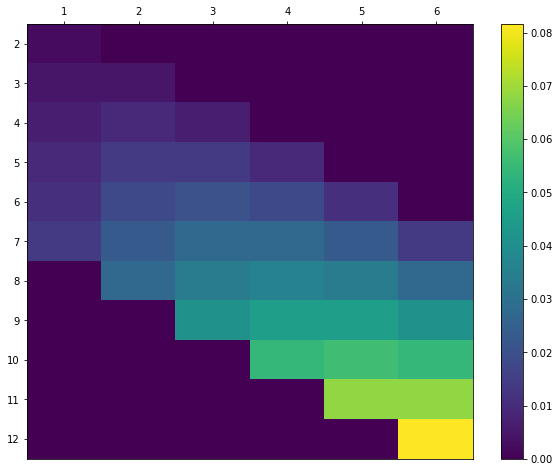

In [17]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax = ax)
plt.show()





In [18]:
np.all(prob >=0)


True

In [19]:
np.sum(prob)

1.000

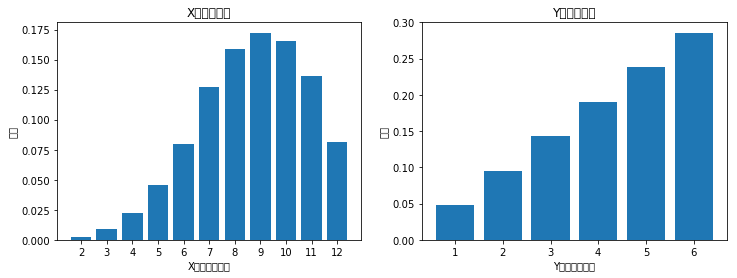

In [20]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

X = [x_set, f_X]
Y = [y_set, f_Y]

prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('Xの周辺分布')
ax1.set_xlabel('Xのとりうる値')
ax1.set_ylabel('確率')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Yの周辺分布')
ax2.set_xlabel('Yのとりうる値')
ax2.set_ylabel('確率')

plt.show()


In [21]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])


8.667

In [22]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [23]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [24]:
a, b = 2, 3
E(XY, lambda x, y: a*x + b*y)

30.333

In [25]:
a * mean_X + b * mean_Y

30.333

In [26]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444

In [27]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [28]:
var_Y =V(XY, g=lambda x, y:y)
var_Y

2.222

In [30]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

cov_xy = Cov(XY)
cov_xy

2.222

In [ ]:
V(XY, lambda x, y: a*x + b*y)